# **Training the Model**

**Code Flow is as follows:**

* Train
  * Importing Libraries
  * Setting Device
  * Hyperparameters
  * Train
* Load Pre-trained Model
* Qualitative Results
* Quantitative Results 

## **Importing Libraries**

In [1]:
import os
import random
from tqdm import tqdm
from copy import deepcopy

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import wandb

/opt/anaconda3/envs/vaem/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import argparse
parser = argparse.ArgumentParser(description= 'Master: Meta Style Transformer for Controllable Zero-Shot and Few-Shot Artistic Style Transfer Implementation')
args = parser.parse_args(args=[])

## **Setting Device**

In [3]:
# Set the device
args.device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(args.device)

cuda:0


## **Hyperparameters**

In [4]:
# Project paths
args.project_root = os.getcwd() # The absolute path of the project root directory.
args.model_save_path = "experiments/weights"  # Default model save path.

# Loss model path
args.loss_model_path = "models/vgg_19_last_layer_is_relu_5_1_output.pt"  # Relative path to the pre-trained VGG19 model cut at the last layer of relu 5_1.
args.use_vgg19_with_batchnorm = False  # If true, use the pre-trained VGG19 model with batch normalization.

# StyleTransformer parameters
args.dim = 256  # Number of input channels.
args.input_resolution = [32, 32]  # Dimensions (height, width) of the input feature map.
args.num_heads = 8  # Number of attention heads.
args.window_size = 8  # Size of the attention window.
args.shift_size = 4  # Offset for the cyclic shift within the window attention mechanism.
args.mlp_ratio = 4.0  # Expansion ratio for the MLP block compared to the number of input channels.
args.act_layer = 'nn.ReLU'  # Activation function used in the MLP block.

# SwinEncoder parameters
args.encoder_model_path = 'models/swin_B_first_2_stages.pt'  # Path where the Swin model is saved or should be saved.
args.freeze_encoder = True  # Freeze the parameters of the model.

# Decoder parameters
args.init_decoder_with_he = True  # Initialize the decoder with He uniform initialization.

# Hyperparameters
args.inner_lr = 0.0001  # Inner learning rate (delta)
args.outer_lr = 0.0001  # Outer learning rate (eta)
args.num_inner_updates = 4  # Number of inner updates (k)
args.max_layers = 4  # Maximal number of stacked layers (T)
args.lambda_style = 10.0  # Weighting term for style loss (lambda)
args.save_every = 25  # Save the model every n iterations

# Dataset paths
args.coco_dataset_path = "datasets/coco_train_dataset/train2017"  # Relative path to the COCO dataset directory.
args.wikiart_dataset_path = "datasets/wikiart/**"  # Relative path to the Wikiart dataset directory.
args.max_iterations = 9000  # Number of iterations to train the model.

# DataLoader parameters
args.batch_size_style = 1  # Batch size for the style datasets
args.batch_size_content = 4  # Batch size for the content dataset
args.num_workers = 4  # Number of workers for data loading
args.shuffle = True  # Whether to shuffle the dataset
args.pin_memory = True  # Whether to pin memory for faster data transfer to CUDA

# Seed configuration.
args.set_seed = False  # Set seed for reproducibility
args.seed = 42  # Seed for reproducibility

# wandb configuration.
args.use_wandb = False  # Use wandb for logging
args.online = False  # Use wandb online
args.exp_name = 'master'  # Experiment name

# Verbose
args.verbose = True  # Print the model information and loss values at each loss calculation.

## **Train** 

In [5]:
from train import Train

In [6]:
# Train the model
trainer = Train(args)
trainer.train()

StyleTransformer
  - encoder.MSA.pos_embeddings: torch.Size([15, 15])
  - encoder.MSA.linear1.weight: torch.Size([768, 256])
  - encoder.MSA.linear1.bias: torch.Size([768])
  - encoder.MSA.linear1_scale.weight: torch.Size([256, 256])
  - encoder.MSA.linear1_scale.bias: torch.Size([256])
  - encoder.MSA.linear1_shift.weight: torch.Size([256, 256])
  - encoder.MSA.linear1_shift.bias: torch.Size([256])
  - encoder.MSA.linear2.weight: torch.Size([256, 256])
  - encoder.MSA.linear2.bias: torch.Size([256])
  - encoder.MSA.linear2_scale.weight: torch.Size([256, 256])
  - encoder.MSA.linear2_scale.bias: torch.Size([256])
  - encoder.MSA.linear2_shift.weight: torch.Size([256, 256])
  - encoder.MSA.linear2_shift.bias: torch.Size([256])
  - encoder.MLP_key.fc1.weight: torch.Size([1024, 256])
  - encoder.MLP_key.fc1.bias: torch.Size([1024])
  - encoder.MLP_key.fc2.weight: torch.Size([256, 1024])
  - encoder.MLP_key.fc2.bias: torch.Size([256])
  - encoder.MLP_scale.fc1.weight: torch.Size([1024, 256

  0%|          | 0/9000 [00:00<?, ?it/s]

Iteration:          1/9000
Inner Loop     1/4 - Total Loss: 88.00, Content Loss: 7.34, Style Loss: 8.07
Inner Loop     2/4 - Total Loss: 73.52, Content Loss: 7.45, Style Loss: 6.61
Inner Loop     3/4 - Total Loss: 63.16, Content Loss: 7.43, Style Loss: 5.57


  0%|          | 1/9000 [00:03<9:46:35,  3.91s/it]

Inner Loop     4/4 - Total Loss: 60.92, Content Loss: 7.44, Style Loss: 5.35



Iteration:          2/9000
Inner Loop     1/4 - Total Loss: 277.47, Content Loss: 7.35, Style Loss: 27.01
Inner Loop     2/4 - Total Loss: 268.20, Content Loss: 7.41, Style Loss: 26.08
Inner Loop     3/4 - Total Loss: 259.83, Content Loss: 7.31, Style Loss: 25.25
Inner Loop     4/4 - Total Loss: 246.13, Content Loss: 7.49, Style Loss: 23.86


  0%|          | 2/9000 [00:04<5:15:25,  2.10s/it]




Iteration:          3/9000
Inner Loop     1/4 - Total Loss: 200.63, Content Loss: 7.33, Style Loss: 19.33
Inner Loop     2/4 - Total Loss: 104.93, Content Loss: 7.38, Style Loss: 9.76
Inner Loop     3/4 - Total Loss: 90.43, Content Loss: 7.30, Style Loss: 8.31


  0%|          | 3/9000 [00:05<3:46:41,  1.51s/it]

Inner Loop     4/4 - Total Loss: 74.06, Content Loss: 7.41, Style Loss: 6.66



Iteration:          4/9000
Inner Loop     1/4 - Total Loss: 160.60, Content Loss: 7.33, Style Loss: 15.33
Inner Loop     2/4 - Total Loss: 131.60, Content Loss: 7.39, Style Loss: 12.42
Inner Loop     3/4 - Total Loss: 131.34, Content Loss: 7.37, Style Loss: 12.40


  0%|          | 4/9000 [00:06<2:52:55,  1.15s/it]

Inner Loop     4/4 - Total Loss: 131.95, Content Loss: 7.38, Style Loss: 12.46



Iteration:          5/9000
Inner Loop     1/4 - Total Loss: 111.68, Content Loss: 7.29, Style Loss: 10.44


  0%|          | 4/9000 [00:06<4:02:00,  1.61s/it]

Inner Loop     2/4 - Total Loss: 103.98, Content Loss: 7.33, Style Loss: 9.66


KeyboardInterrupt: 

## **Loading Pre-trained Model**

#### **making the necessary test imports

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import os
import glob
import cv2
import sys
import random

from codes.models import SwinEncoder, StyleDecoder, StyleTransformer
from codes.loss import custom_loss

#### **setting the dest device**

In [10]:
test_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_device

device(type='cuda')

#### **declaring the load_pretained_model object**

In [11]:
class load_pretained_model(nn.Module):

    def __init__(self,
                 style_transformer_model_path: str = None,
                 decoder_model_path: str = None,
                 swin_encoder_model_path: str = None,
                 dim=256,
                 input_resolution=[32, 32],
                 num_heads=8,
                 window_size=8,
                 mlp_ratio=4.0,
                 act_layer='nn.ReLU'):

        super(load_pretained_model, self).__init__()

        self.style_transformer_model_path = style_transformer_model_path
        self.decoder_model_path = decoder_model_path
        self.swin_encoder_model_path = swin_encoder_model_path


        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.mlp_ratio = mlp_ratio
        self.act_layer = act_layer
        
        # create the style transformer model
        self.style_transformer = StyleTransformer(
            dim=self.dim,
            input_resolution=tuple(self.input_resolution),
            num_heads=self.num_heads,
            window_size=self.window_size,
            mlp_ratio=self.mlp_ratio,
        )

        # swin encoder automatically loads the pre-trained model weights if model path does not exist
        self.swin_encoder = SwinEncoder(
            relative_model_path=self.swin_encoder_model_path
        )

        # create the decoder model
        self.decoder = StyleDecoder()

        # load the models
        self.load_models()

        # set the models to eval mode
        self.style_transformer.eval()
        self.swin_encoder.eval()
        self.decoder.eval()


    def load_models(self):
        self.style_transformer.load_state_dict(torch.load(self.style_transformer_model_path))
        self.decoder.load_state_dict(torch.load(self.decoder_model_path))



    def forward(self,
                content_images: torch.Tensor,
                style_images: torch.Tensor,
                ):
        # get the content and style features
        content_features = self.swin_encoder(content_images)
        style_features = self.swin_encoder(style_images)

        # get the transformed features and permute the dimensions
        transformed_features = self.style_transformer(content_features, style_features).permute(0, 3, 1, 2)

        # get the output image
        output_images = self.decoder(transformed_features)

        return output_images


#### **create the model and load pre-trained weights**

In [13]:
# get the full project path
project_path = os.getcwd()

# declare the pre-trained model paths
style_transformer_model_path = os.path.join(project_path, "test_weights/style_transformer_pretrained.pt")
decoder_model_path = os.path.join(project_path, "test_weights/decoder_pretrained.pt")
swin_encoder_model_path = os.path.join(project_path, "test_weights/swin_encoder_pretrained.pt")

# load the pre-trained model
model = load_pretained_model(
    style_transformer_model_path=style_transformer_model_path,
    decoder_model_path=decoder_model_path,
    swin_encoder_model_path=swin_encoder_model_path
).eval().to(test_device)

#### **Create the test dataloader**

In [15]:
transform_test = transforms.Compose([
        transforms.ToPILImage(), # -> PIL image
        transforms.Resize((256, 256)), # -> resize to 512x512
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]
        )

transform_denormalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])

# create test dataset
class test_dataset(Dataset):
    # initialize the dataset
    def __init__(self, project_absolute_path, test_dataset_relative_path = "datasets/test_set"):
        # get the absolute path of the dataset
        dataset_absolute_path = os.path.join(project_absolute_path, test_dataset_relative_path)

        # check if the dataset exists
        if not os.path.exists(dataset_absolute_path):
            raise FileNotFoundError(f"Dataset not found at {dataset_absolute_path}")

        # load coco dataset paths from local directory
        self.coco_dataset_images_paths = sorted(glob.glob(os.path.join(dataset_absolute_path, "*.jpg")))

        # check if the dataset is empty
        if len(self.coco_dataset_images_paths) == 0:
            raise FileNotFoundError(f"No images found in the dataset at {dataset_absolute_path}\n\n!!!!!\nPlease download the dataset from https://www.kaggle.com/competitions/painter-by-numbers/data?select=test.zip and extract it to the datasets/test directory.\n!!!!!\n")

    # return the length of the dataset
    def __len__(self):
        return len(self.coco_dataset_images_paths)

    # return the image at the given index
    def __getitem__(self, id):
        # load image
        img = cv2.imread(self.coco_dataset_images_paths[id])

        try:
            # convert the image to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except:
            print(f"Error reading the image at {self.coco_dataset_images_paths[id]}")
            sys.exit(1)

        # apply transformations
        img = transform_test(img)

        return img
 

# create the test dataset object
test_dataset_object = test_dataset(project_path)


TEST_BATCH_SIZE = 1

# create a test data loader for content and style images
test_dataloader = DataLoader(test_dataset_object,
                             batch_size=TEST_BATCH_SIZE,
                             num_workers=0, 
                             pin_memory=True,
                             shuffle=True)

# get the dataloader iterator
test_dataloader_iterator = iter(test_dataloader)


#### **Test the model and store losses**

In [16]:
# create the loss object
# loss = custom_loss(project_absolute_path=project_path)
loss = custom_loss(project_absolute_path=project_path).eval().to(test_device)

total_losses = []
content_losses = []
style_losses = []

num_of_different_batch_combinations = len(test_dataset_object) // (TEST_BATCH_SIZE*2)

for i in range(num_of_different_batch_combinations):
    # sample a batch of images for content and style
    content_images = next(test_dataloader_iterator)
    style_images = next(test_dataloader_iterator)

    # move the images to the test device
    content_images = content_images.to(test_device)
    style_images = style_images.to(test_device)

    # get the output images
    output_images = model(content_images, style_images)

    # # carry the images to the cpu
    # output_images = output_images.cpu()
    # content_images = content_images.cpu()
    # style_images = style_images.cpu()


    # calculate the loss
    total_loss, content_loss, style_loss = loss(content_images,
                    style_images,
                    output_images,
                    output_content_and_style_loss=True,
                    output_similarity_loss=False
                    )

    # print the loss
    print(f"Total loss: {total_loss.item():.2f}, Content loss: {content_loss.item():.2f}, Style loss: {style_loss.item():.2f}")

    # append the losses
    total_losses.append(total_loss.item())
    content_losses.append(content_loss.item())
    style_losses.append(style_loss.item())


Total loss: 322.28, Content loss: 7.36, Style loss: 31.49
Total loss: 210.99, Content loss: 7.27, Style loss: 20.37
Total loss: 190.13, Content loss: 7.10, Style loss: 18.30
Total loss: 503.07, Content loss: 7.34, Style loss: 49.57
Total loss: 174.70, Content loss: 7.27, Style loss: 16.74
Total loss: 39.33, Content loss: 7.42, Style loss: 3.19
Total loss: 367.02, Content loss: 7.52, Style loss: 35.95
Total loss: 473.62, Content loss: 7.51, Style loss: 46.61
Total loss: 210.46, Content loss: 7.30, Style loss: 20.32
Total loss: 153.94, Content loss: 6.98, Style loss: 14.70
Total loss: 190.93, Content loss: 7.33, Style loss: 18.36
Total loss: 417.51, Content loss: 7.28, Style loss: 41.02
Total loss: 512.01, Content loss: 7.53, Style loss: 50.45
Total loss: 206.13, Content loss: 7.41, Style loss: 19.87
Total loss: 187.23, Content loss: 7.41, Style loss: 17.98


#### **calculate average losses**

In [17]:
# calculate the average loss
average_total_loss = sum(total_losses) / len(total_losses)
average_content_loss = sum(content_losses) / len(content_losses)
average_style_loss = sum(style_losses) / len(style_losses)

# print the average loss
print(f"For {num_of_different_batch_combinations} different batch combinations with batch size {TEST_BATCH_SIZE}:")
print(f"\tAverage total loss: {average_total_loss:.2f}")
print(f"\tAverage content loss: {average_content_loss:.2f}")
print(f"\tAverage style loss: {average_style_loss:.2f}")

For 15 different batch combinations with batch size 1:
	Average total loss: 277.29
	Average content loss: 7.34
	Average style loss: 27.00


#### **Display the last batch results**

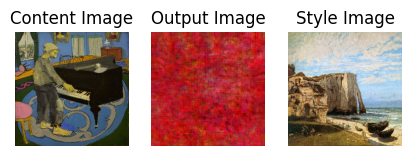

In [20]:
# display the last batch of images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(TEST_BATCH_SIZE, 3, figsize=(TEST_BATCH_SIZE*5, 5))

if TEST_BATCH_SIZE != 1:
    for i in range(TEST_BATCH_SIZE):
        ax[i, 0].imshow((transform_denormalize(content_images[i].detach().cpu()).permute(1, 2, 0)))
        ax[i, 0].axis("off")
        ax[i, 0].set_title("Content Image")


        ax[i, 1].imshow(((output_images[i].detach().cpu()).permute(1, 2, 0)))
        ax[i, 1].axis("off")
        ax[i, 1].set_title("Output Image")

        ax[i, 2].imshow((transform_denormalize(style_images[i].detach().cpu()).permute(1, 2, 0)))
        ax[i, 2].axis("off")
        ax[i, 2].set_title("Style Image")
else:
    ax[0].imshow((transform_denormalize(content_images[0].detach().cpu()).permute(1, 2, 0)))
    ax[0].axis("off")
    ax[0].set_title("Content Image")

    ax[1].imshow((output_images[0].detach().cpu()).permute(1, 2, 0))
    ax[1].axis("off")
    ax[1].set_title("Output Image")

    ax[2].imshow((transform_denormalize(style_images[0].detach().cpu()).permute(1, 2, 0)))
    ax[2].axis("off")
    ax[2].set_title("Style Image")
plt.show()

1. We encountered ambiguity regarding the Swin model used in the Encoder section, specifically whether it was pretrained and if it was included in the training process. To address this, we trained it under different configurations: pretrained and non-pretrained, both with and without training inclusion. Ultimately, we decided to use the pretrained model in a frozen state as the default configuration and selected the base Swin model to align with the decoder architecture's dimensions specified in the paper.


2. There are discrepancies between the descriptions and visuals of the StyleTransformer model:
    - In the model depicted in the image, following the self-attention in the Transformer Decoder block, the MLP layer and residual connections are included. However, the text does not mention the MLP. 
    - The image shows that the content does not undergo linear projection before cross-attention in the Transformer Decoder block, which contradicts the text.
    - The image indicates that instance normalization is applied to the query and key projections used in cross-attention, whereas the text specifies that instance normalization is applied before the projection.
    - The text does not clarify whether the instance norms are affine or not.


3. There is no detailed explanation regarding the implementation of parameter-sharing blocks in the Transformer Encoder model. We trained models in which the value projection in self-attention was shared for scale and shift, as well as models with distinct projections for each with the same attention maps for both.


4. In the loss functions, the paper does not explicitly clarify whether squared error or Euclidean distance is used. Although the cited paper (Johnson et al., 2016) employs Euclidean distance, we used squared error for the loss values to align with the paper.


5. The paper does not explicitly specify whether the loss functions are scaled based on batch size, channel size, image height, or image width. We calculate the mean of the squared distances, thereby scaling the loss according to batch size and channel size, as well as image height and width in the content loss. This approach seemed more plausible and ensured that the loss values were better aligned with the results on the paper.


6. While training the model using the meta-learning training algorithm (Figure 1), we were unable to achieve the desired loss values and output images (Figure 2.). 


<div style="text-align: center;">
    <img src="./figures/algorithm.png" alt="**Figure 1**: The Meta Training algorithm used in the paper." width="700" />
</div>

<div style="text-align: center;"> Figure 1: The Meta Training algorithm used in the paper.   </div>

<div style="text-align: center;">
    <img src="./figures/master-output.png" alt="**Figure 2**: The loss plots of the default Master model training, with Meta Training algorithm" width="1000" />
</div>

<div style="text-align: center;"> Figure 2: The loss plots of the default Master model training, with Meta Training algorithm  </div>

However, without the meta-learning training algorithm, when we directly trained the real model parameters with the Adam optimizer, we found that  the loss plots met our expectations and the model preserves the content in its outputs.

<div style="text-align: center;">
    <img src="./figures/master-nometa.png" alt="**Figure 3**: The loss plots of the  Master model without meta training." width="1000" />
</div>

<div style="text-align: center;"> Figure 3: The loss plots of the  Master model without meta training. </div>

<div style="text-align: center;">
    <img src="./figures/master-nometa-out1.png" alt="**Figure 3**: The outputs  of the  Master model without meta training." width="1000" />
</div>
<div style="text-align: center;">
    <img src="./figures/master-nometa-out2.png" alt="**Figure 4**: The outputs of the  Master model without meta training." width="1000" />
</div>

<div style="text-align: center;"> Figure 4: Example outputs from the Master model training without Meta Training algorithm, with different hyperparameters. </div>

- To address the issues highlighted in the second challenge concerning StyleTransformer implementations, we implemented a variety of models to evaluate the discrepancies during training. Additionally to determine if there were any miscalculations within the loss functions, we adjusted the lambda parameter, which scales the losses. Various training sessions were conducted as illustrated in Figure 5. Based on the outcomes, we hypothesize that the core issue resides within the Meta Training algorithm. Consequently, our current focus is on investigating and refining the Meta Training algorithm to resolve these issues. The figures below (Figure 5, 6, 7, 8) are from 2 experiments where we interpreted the architecture in a different way (we tried over 5 architectures due to ambiguities, it is one of them). You can see that learning content without meta-learning were possible, when hyperparameters are adjusted.

<div style="text-align: center;">
    <img src="./figures/master-lambda-out.png" alt="**Figure 5**: The output of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10." width="1000" />
</div>

<div style="text-align: center;">  Figure 5: The output of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10.</div>

<div style="text-align: center;">
    <img src="./figures/master_nometa_another_interpretation_with_different_lambdas_out2.png" alt="**Figure 5**: The output of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10." width="1000" />
</div>


<div style="text-align: center;">  Figure 6: Another output of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10.</div>

<div style="text-align: center;">
    <img src="./figures/master_nometa_another_interpretation_with_different_lambdas_content.png" alt="**Figure 5**: The output of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10." width="1000" />
</div>

<div style="text-align: center;">  Figure 7: The content losses of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10.</div>

<div style="text-align: center;">
    <img src="./figures/master_nometa_another_interpretation_with_different_lambdas_style.png" alt="**Figure 5**: The output of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10." width="1000" />
</div>


<div style="text-align: center;">  Figure 8: The style losses of the Master model without meta training, using different lambda parameters: above with lambda set to 2, and below with lambda set to 10.</div>